# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works. You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
# YOUR CODE HERE
df = pd.read_csv("sharktank.csv")
df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# YOUR CODE HERE
#Rename the column: O'Leary to Leary
#df.rename(columns = {"O'Leary" : 'Leary'}, inplace = True)
#Change the NaNs of the sharks and the guest to 0
#df = df.fillna({'Corcoran':0, 'Cuban':0, 'Greiner':0, 'Herjavec':0, 'John':0, 'Leary':0, 'Harrington':0, 'Guest':0 })
df.loc[:, 'Corcoran':'Guest'] = df.loc[:,'Corcoran':'Guest'].fillna(0)
df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# YOUR CODE HERE
#Cleaning the Amount column
df.Amount = df.Amount.apply(str)
df.Amount = df.Amount.str.strip("$")
Amt = df.Amount.str[0]

#Cleaning the Equity column
df.Equity = df.Equity.apply(str)
df.Equity = df.Equity.str.strip("%")
Eqt = df.Equity.str[0]

#These strings have commas as thousands separators so you will have to remove them before the call to float
df['Amount'] = df['Amount'].apply(lambda x: float(x.split()[0].replace(',', '')))
df['Equity'] = df['Equity'].apply(lambda x: float(x.split()[0].replace(',', '')))

#Cast both variables to numeric type
df['Amount'] = df['Amount'].astype(float)
df['Equity'] = df['Equity'].astype(float)
df


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


The amount and equity columns were being treated as categorical variables because both the columns have an additional symbol next to their values. The amount column has the $ sign and the Equity column has the % sign. However, after cleaning them up, we have converted them to a float in order to perform mathematical operations. As it can be seen below.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               495 non-null    float64
 1   No. in series        495 non-null    float64
 2   Company              495 non-null    object 
 3   Deal                 495 non-null    object 
 4   Industry             495 non-null    object 
 5   Entrepreneur Gender  495 non-null    object 
 6   Amount               249 non-null    float64
 7   Equity               245 non-null    float64
 8   Corcoran             495 non-null    float64
 9   Cuban                495 non-null    float64
 10  Greiner              495 non-null    float64
 11  Herjavec             495 non-null    float64
 12  John                 495 non-null    float64
 13  O'Leary              495 non-null    float64
 14  Harrington           495 non-null    float64
 15  Guest                495 non-null    flo

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [6]:
# YOUR CODE HERE
#1. Create a new dataframe which has only companies with investments
#df_new = df_new[df_new['Deal'].str.contains("Yes")]
df_new = df[df['Amount'].notnull()].copy()
#2. Find which line has equity 0 and drop it.
#df_new.drop(df_new[df_new['Equity'] < 1].index, inplace = True)
df_new.reset_index(drop = True, inplace = True)
df_new[df_new['Equity'] == 0]




,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
150,5.0,13.0,The Wall DoctoRX,Yes,Lifestyle / Home,Male,150000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,exclusive rights to sell internationally


In [7]:
#Calculate which comapny has the biggest value
worth_shark = df_new.drop(150)

worth = worth_shark['Amount'] / worth_shark['Equity'] * 100
worth_shark.loc[[worth.idxmax()]]

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
206,6.0,11.0,Zipz,Yes,Food and Beverage,Male,2500000.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,with an option for another $2.5 Million for an...


In [8]:
#Calculate which comapny was funded more than others
df[df.Amount == df.Amount.max()]

#or we can do the same step like this:
#df.loc[[df['Amount'].idxmax()]]

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
483,6.0,27.0,AirCar,Yes,Green/CleanTech,Male,5000000.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Contingent on getting deal to bring to contine...


The company 'Zipz' had the biggest valuation. They received an Amount of $2.5 million and the sharks had a total equity of 10% which puts the value of the company at $25 million, using the following calculation: 2,500,000/0.1 .
Additionally, we can see the company which received the most investment was, 'AirCar'. They received a total of $5,000,000 in investments. However, the sharks have a 50% equity which puts the value of the company at $10 million. Using the calculation: 5,000,000 / 0.5 . Therefore, the company which received the highest funding and the company which is most valuable are not the same.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

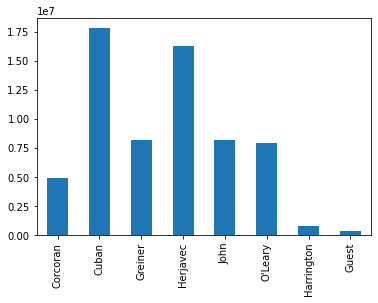

In [9]:
# ENTER CODE HERE.
# Assume each shark invests equally in a company.
# create a new column that represents number of sharks that invested in company:
df_new['num_of_sharks'] = df_new.loc[:,'Corcoran':'Guest'].sum(axis=1)

#compute the invested amount per shark for each company:
df_new['invested_amount'] = df_new['Amount'] / df_new['num_of_sharks']

#multiple the invested amount by each shark column to get 
#their investment. We can also sum up the investments by 
#shark and plot a bar graph.
df_new.loc[:, 'Corcoran':'Guest'].multiply(df_new['invested_amount'], axis=0).sum(axis=0).plot.bar()



In [10]:
#Creating a new column with amount of sharks who invested in each company
df_new['sharks_quantity_per_invest'] = df_new.loc[:,'Corcoran':'Guest'].sum(axis=1)

In [11]:
df_new.loc[:,'Corcoran':'Guest'].sum(axis=1)

0      1.0
1      2.0
2      2.0
3      5.0
4      1.0
      ... 
244    1.0
245    1.0
246    3.0
247    1.0
248    1.0
Length: 249, dtype: float64

According to the above data, Cuban invested the most, followed by Herjavec. The 'Guest' sharks has invested the least
amount of money.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

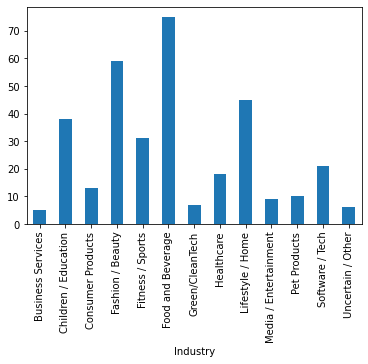

In [12]:
#Enter Code here
df['Sharks_num'] = df.loc[:, 'Corcoran': 'Guest'].sum(axis=1)
df.groupby('Industry')['Sharks_num'].sum().plot.bar()

According to the above visualization, we can conclude that the 'Food and Beverage' industry received the highest funding, followed by the 'Fashion/Beauty' industry and so on.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF and Notebook (ipynb) to iLearn